# Implementation 7 - Discriminant Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [2]:
dataset = pd.read_csv('Complexity 2/Social_Network_Ads.csv')

In [3]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,no
1,15810944,Male,35,20000,no
2,15668575,Female,26,43000,no
3,15603246,Female,27,57000,no
4,15804002,Male,19,76000,no
5,15728773,Male,27,58000,no
6,15598044,Female,27,84000,no
7,15694829,Female,32,150000,yes
8,15600575,Male,25,33000,no
9,15727311,Female,35,65000,no


In [4]:
X = dataset[['Age', 'EstimatedSalary']].values
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [5]:
print(dataset['Purchased'][:10].values)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


## Inspecting the data set

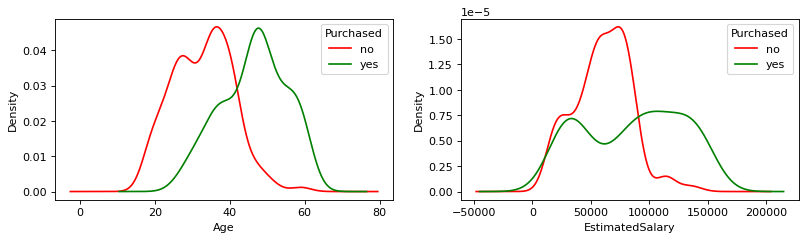

In [6]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

Alternative:

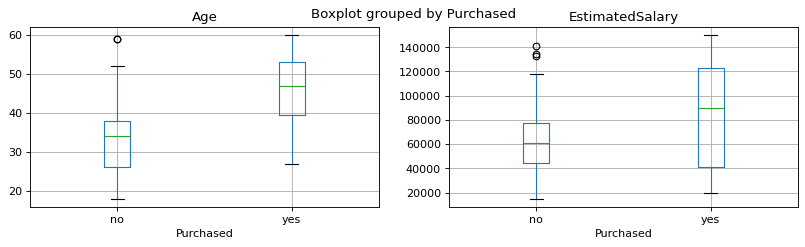

In [7]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    dataset.boxplot(column=feature_list[i_axs], by='Purchased', ax=axs[i_axs])
plt.show()  

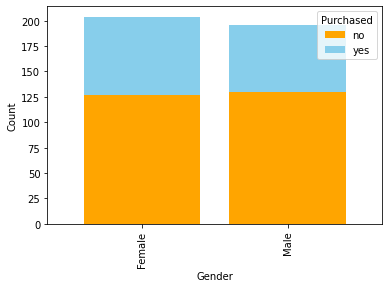

In [8]:
df_plot = dataset.groupby(['Gender', 'Purchased']).size().reset_index().pivot(index='Gender', columns='Purchased', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show() 

## Preparing the data set

**Encoding:**

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


**Train-test split:**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


In [11]:
print(X_train[:10])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


**Feature scaling:**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training a logistic regression model

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = {'classifier': LogisticRegression()}
# classifier = LogisticRegression(C=0.01, solver='liblinear')
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

In [15]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [16]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training a LDA model

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = {'classifier': LinearDiscriminantAnalysis()}
lda['classifier'].fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [20]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training a k-NN model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)}
knn['classifier'].fit(X_train, y_train)print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [23]:
print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training a Decision Tree model

In [165]:
from sklearn.tree import DecisionTreeClassifier
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)}
# dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [166]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [167]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[30,100000]]))))

['yes']


## Training a SVM model

In [168]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [169]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [170]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Making predictions

**Probability of purchasing:**

In [171]:
log_reg['y_proba'] = log_reg['classifier'].predict_proba(X_test)

In [172]:
lda['y_proba'] = lda['classifier'].predict_proba(X_test)

In [173]:
knn['y_proba'] = knn['classifier'].predict_proba(X_test)
knn['y_proba'][:10]+

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8]])

In [174]:
dt['y_proba'] = dt['classifier'].predict_proba(X_test)
dt['y_proba'][:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.45454545, 0.54545455]])

In [175]:
svm['y_proba'] = svm['classifier'].predict_proba(X_test)
svm['y_proba'][:10]

array([[0.87256648, 0.12743352],
       [0.83739142, 0.16260858],
       [0.79479061, 0.20520939],
       [0.90074611, 0.09925389],
       [0.90329225, 0.09670775],
       [0.9923935 , 0.0076065 ],
       [0.98590055, 0.01409945],
       [0.21854536, 0.78145464],
       [0.99308966, 0.00691034],
       [0.52478082, 0.47521918]])

**Prediction of the class and comparison with the true one:**

In [176]:
log_reg['y_pred'] = log_reg['classifier'].predict(X_test)

In [177]:
lda['y_pred'] = lda['classifier'].predict(X_test)

In [178]:
knn['y_pred'] = knn['classifier'].predict(X_test)
print(np.concatenate((knn['y_pred'].reshape(len(knn['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


In [179]:
dt['y_pred'] = dt['classifier'].predict(X_test)
print(np.concatenate((dt['y_pred'].reshape(len(dt['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


In [180]:
svm['y_pred'] = svm['classifier'].predict(X_test)
print(np.concatenate((svm['y_pred'].reshape(len(svm['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Performance assessment

**Confusion matrix:**

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn['y_pred'])
print(cm)

[[64  4]
 [ 3 29]]


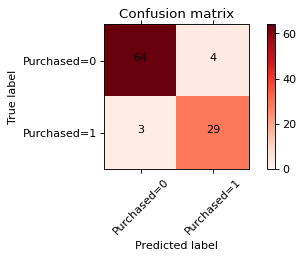

In [182]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Purchased=0','Purchased=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy, precision, recall:**

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, log_reg['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, log_reg['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, log_reg['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75


In [159]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, lda['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, lda['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, lda['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.78


In [160]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, knn['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, knn['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, knn['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.93
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.91


In [161]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, dt['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, dt['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, dt['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.91
Precision (proportion of true purchases among purchase predictions) is 0.83
Recall (proportion of true purchases that are correctly predicted) is 0.91


In [162]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, svm['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, svm['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, svm['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.92
Recall (proportion of true purchases that are correctly predicted) is 0.75


**ROC curve and AUC:**

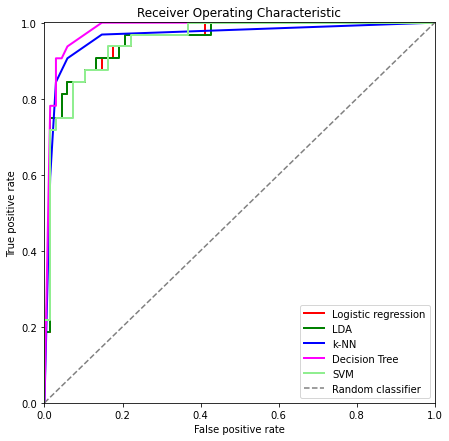

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score

log_reg['y_score'] = log_reg['y_proba'][:,1]
lda['y_score'] = lda['y_proba'][:,1]
knn['y_score'] = knn['y_proba'][:,1]
dt['y_score'] = dt['y_proba'][:,1]
svm['y_score'] = svm['y_proba'][:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve for logistic regression
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, log_reg['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='Logistic regression')
# Plot ROC curve for LDA
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lda['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=2, label='LDA')
# Plot ROC curve for k-NN
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, knn['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='k-NN')
# Plot ROC curve for Decision Tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='magenta', linewidth=2, label='Decision Tree')
# Plot ROC curve for SVM
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, svm['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='lightgreen', linewidth=2, label='SVM')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [129]:
print('AUC for logistic regression: ', roc_auc_score(y_test, log_reg['y_score']))
print('AUC for LDA: ', roc_auc_score(y_test, lda['y_score']))
print('AUC for k-NN: ', roc_auc_score(y_test, knn['y_score']))
print('AUC for Decision Tree: ', roc_auc_score(y_test, dt['y_score']))
print('AUC for SVM: ', roc_auc_score(y_test, svm['y_score']))

AUC for logistic regression:  0.9540441176470588
AUC for LDA:  0.9540441176470588
AUC for k-NN:  0.9630055147058824
AUC for Decision Tree:  0.9825367647058822
AUC for SVM:  0.953125


## Plotting class domains

**On test set**

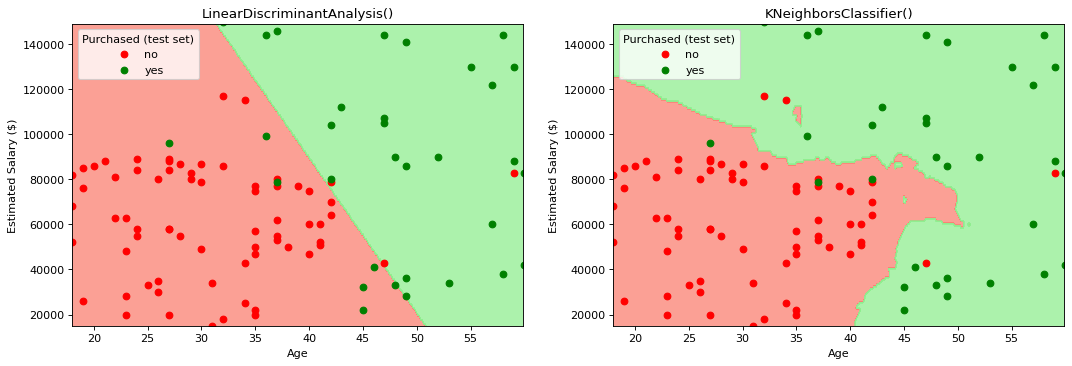

In [113]:
classifier_list = [lda, knn]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 

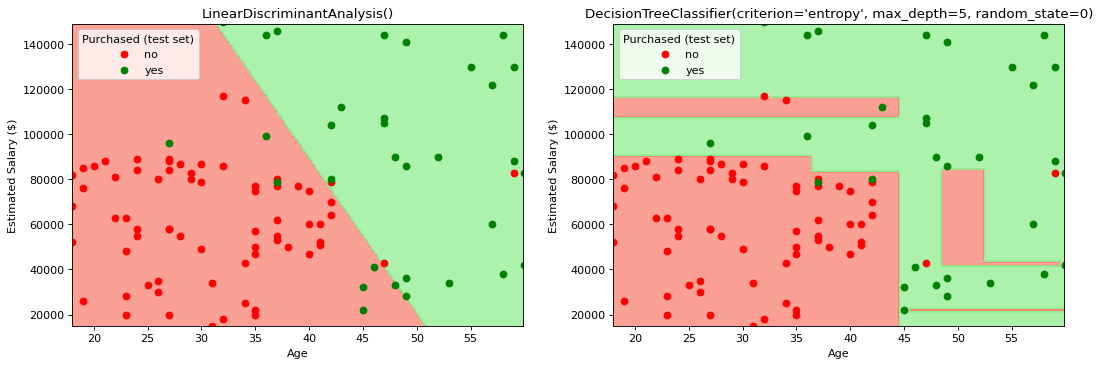

In [184]:
classifier_list = [lda, dt]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 

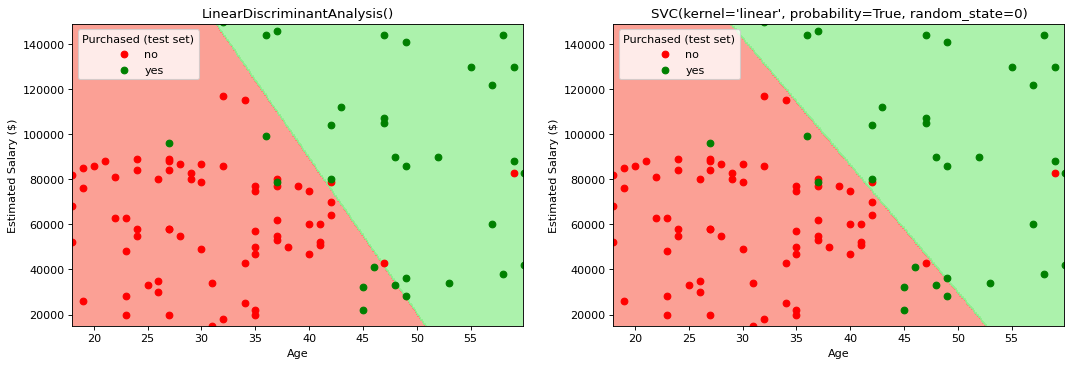

In [130]:
classifier_list = [lda, svm]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 